In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AvirukBasak/innomatics-internship-assessment-hackathon/main/dataframe.csv')
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [ ]:
df.shape

(1697, 2)

In [ ]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [ ]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
from sklearn.model_selection import train_test_split
traindf, testdf = train_test_split(df, test_size=0.2)

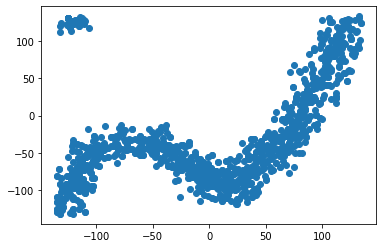

In [ ]:
x = traindf['input']
y = traindf['output']
plt.scatter(x, y)
plt.show()

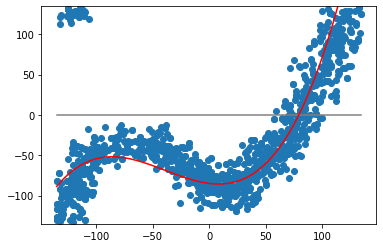

35.285685389691466


In [ ]:
import math
max = 134.605775
min = -134.962839
fm = lambda x: (  ((0.0395*x-0.04))**3 + ((0.08566*x-1))**2 + (0.035*x-0.9) ) * 1.3 - 85  
fm_vf = np.vectorize(fm)

xm = np.arange(min, max, 0.01)
ym = xm
plt.scatter(x, y)
plt.plot([min, max], [0, 0], color='gray')
plt.plot(xm, fm_vf(ym), color='red')
plt.ylim(min,max)
plt.show()


test_out = fm_vf(testdf['input'])
mse = np.square(testdf['output'] - test_out).sum() / testdf.shape[0]
rmse = math.sqrt(mse)
print(rmse)